In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier


In [11]:
def analyze(max_depth):
    data = pd.read_csv('Social_Network_Ads.csv')
    X = data.iloc[:,2:4].values
    y= data.iloc[:,-1].values
    clf = DecisionTreeClassifier(max_depth= max_depth)
    clf.fit(X,y)
    a = np.arange(start=X[:,0].min()-1,stop= X[:,0].max()+1,step =0.1)
    b = np.arange(start=X[:,1].min()-1,stop= X[:,1].max()+1,step =100)
    xx,yy =np.meshgrid(a,b)
    input_array = np.array([xx.ravel(),yy.ravel()]).T
    labels =clf.predict(input_array)
    plt.contourf(xx,yy,labels.reshape(xx.shape),alpha =0.5)
    plt.scatter(X[:,0],X[:,1],c=y)

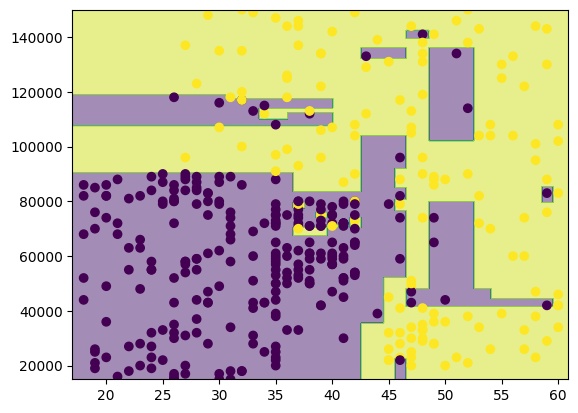

In [13]:
analyze(max_depth= None) # overfitting

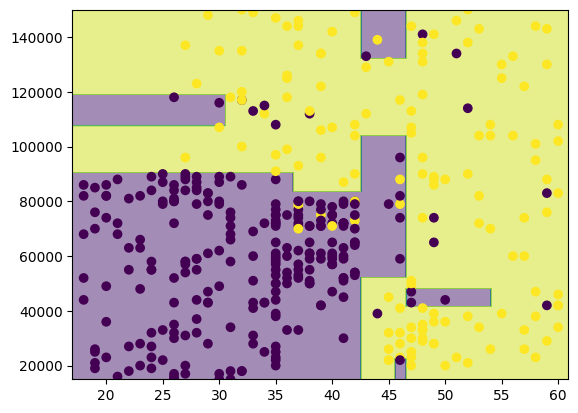

In [19]:
analyze(max_depth=5)

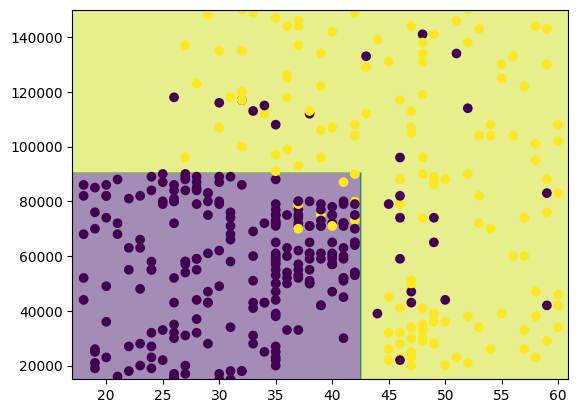

In [20]:
analyze(max_depth=3)


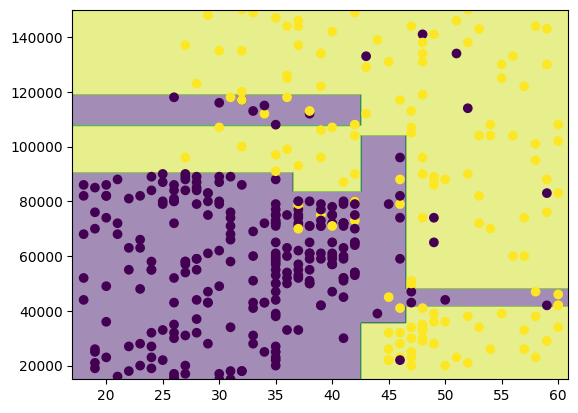

In [22]:
analyze(max_depth=4)


visuilizing to for hyper parameter
* https://dt-visualise.herokuapp.com/

#### regression tree

In [26]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [24]:
!pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 239.1 kB/s eta 0:00:00 kB/s eta 0:00:01:01

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [27]:
boston = load_boston()
df = pd.DataFrame(boston.data)

NameError: name 'load_boston' is not defined

In [28]:
df.columns = boston.feature_names
df['MEDV'] = boston.target
     

NameError: name 'boston' is not defined

In [29]:


X = df.iloc[:,0:13]
y = df.iloc[:,13]
     


NameError: name 'df' is not defined

In [30]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
     

rt = DecisionTreeRegressor(criterion = 'mse', max_depth=5)
     

rt.fit(X_train,y_train)
     

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


y_pred = rt.predict(X_test)
     

r2_score(y_test,y_pred)
     

0.8833565347917997



NameError: name 'X' is not defined

In [31]:


param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['mse','mae'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}
     

reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)
     

reg.fit(X_train,y_train)
     



NameError: name 'GridSearchCV' is not defined

In [32]:


reg.best_score_
     

0.6452352174104019


reg.best_params_
     

{'criterion': 'mse',
 'max_depth': None,
 'max_features': 0.5,
 'min_samples_split': 0.25}

# Feature Importance

for importance, name in sorted(zip(rt.feature_importances_, X_train.columns),reverse=True):
  print (name, importance)
     


NameError: name 'reg' is not defined

### new library  for visualizing the decision tree

In [37]:
from sklearn.tree import plot_tree

In [40]:
data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[:,2:4].values
y= data.iloc[:,-1].values

In [45]:
clf = DecisionTreeClassifier(max_depth= 5)

In [53]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [46]:
clf.fit(X,y)

DecisionTreeClassifier(max_depth=5)

[Text(0.42083333333333334, 0.9166666666666666, 'x[0] <= 42.5\ngini = 0.459\nsamples = 400\nvalue = [257, 143]'),
 Text(0.16666666666666666, 0.75, 'x[1] <= 90500.0\ngini = 0.271\nsamples = 285\nvalue = [239.0, 46.0]'),
 Text(0.06666666666666667, 0.5833333333333334, 'x[0] <= 36.5\ngini = 0.072\nsamples = 241\nvalue = [232, 9]'),
 Text(0.03333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 162\nvalue = [162, 0]'),
 Text(0.1, 0.4166666666666667, 'x[1] <= 83500.0\ngini = 0.202\nsamples = 79\nvalue = [70, 9]'),
 Text(0.06666666666666667, 0.25, 'x[1] <= 67500.0\ngini = 0.165\nsamples = 77\nvalue = [70, 7]'),
 Text(0.03333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.307\nsamples = 37\nvalue = [30, 7]'),
 Text(0.13333333333333333, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.26666666666666666, 0.5833333333333334, 'x[1] <= 119000.0\ngini = 0.268\nsamples = 44\nvalue = [7, 37]'),
 Text(0.2333333333

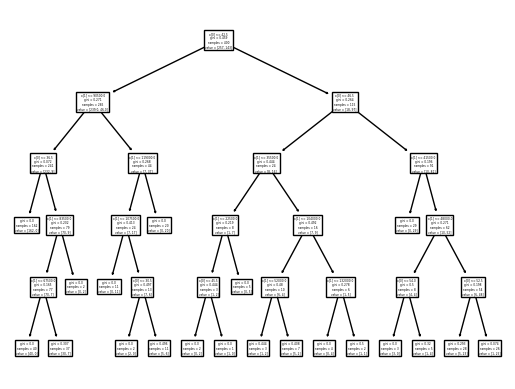

In [47]:
plot_tree(clf)

In [50]:
!pip install dtreeviz

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [51]:
!python3 -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 257.6 kB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [66]:
import graphviz.backend as bd

In [78]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image,display_svg,SVG

In [79]:
clf = tree.DecisionTreeClassifier(max_depth= 3)
iris =load_iris()

In [80]:
X_train = iris.data
y_train = iris.target
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

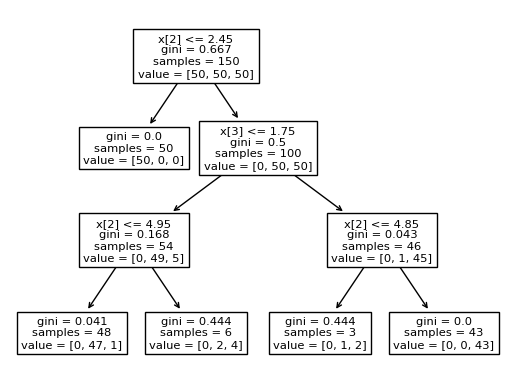

In [81]:
plot_tree(clf)

In [90]:
viz = dtreeviz(clf,
              X_train,
              y_train,
              feature_names= iris.feature_names,
              class_names=['setosa','versicolor','virgnica'])
viz

/tmp/ipykernel_14519/3108362755.py:1: DeprecationWarning: dtreeviz() function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.view()


TypeError: 'int' object is not subscriptable

In [91]:
import graphviz.backend as be


In [92]:

from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [93]:
clas = tree.DecisionTreeClassifier()  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

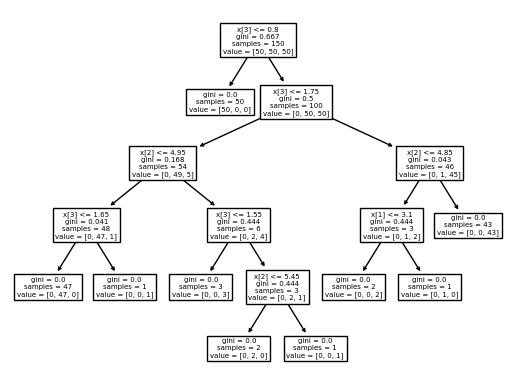

In [94]:
from sklearn.tree import plot_tree
plot_tree(clas)

In [95]:
viz = dtreeviz(clas, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"])
viz

/tmp/ipykernel_14519/1431877341.py:1: DeprecationWarning: dtreeviz() function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.view()


TypeError: 'int' object is not subscriptable

In [105]:
viz_model = dtrees.dtreeviz(clf, X_train, y_train, target_name=iris.target_names, feature_names=iris.feature_names)

AttributeError: module 'dtrees' has no attribute 'dtreeviz'

In [104]:
import dtrees


In [103]:
!pip install dtrees

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for dtrees: filename=dtrees-0.8b1-py3-none-any.whl size=14362 sha256=287abb5b7fa8b754863e1691331fbb41782b54ffe10bab3c99e256065a5ac9bb
  Stored in directory: /home/anubhav/.cache/pip/wheels/56/19/f8/11d77b474d05a43fb6a47f0f749f370d602fcfd08e6d921dc2
Successfully built dtrees
